In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Miray/Desktop")
os.getcwd()

'C:\\Users\\Miray\\Desktop'

**Bu notebook'ta öncelikle soru işaretleri NaN yapılmış ve dummy variable dönüşümü yapılmıştır. PCA öncesi yapılan modellemelerin sonuçları 
PCA sonrasından düşük olduğu için tüm regression modellerinin sonucu PCA sonrasıdır ve modeller tuning edilmiştir.Shuffle=False'dur
En alt hücrede tüm modellerin RMSE değerleri yazılmıştır**

In [3]:

import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
odv=pd.read_csv("odev.csv")
df=odv.copy()
df.head()


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [5]:
kat_df=df.select_dtypes(include=["object"])
kat_df.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [6]:
df.loc[df[df["ind_420"] == "?"].index] = np.nan 


In [7]:
df["ind_422"] = df["ind_422"].astype('float64')
df["ind_420"] = df["ind_420"].astype('float64')
df.dropna()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
5,45.0,41.0,100.000000,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-78.1,-84.0,-185.0,-386.0,1.000000,0.794403,0.730549,-15.176927,-35.722047,-37.098277
6,49.0,45.0,100.000000,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-71.7,-84.0,-184.0,-386.0,1.000000,0.854144,0.746727,-15.176298,-35.720567,-37.096740
7,51.0,49.0,92.857143,35.714286,57.142857,77.015062,69.155269,11.55,13.86,15.86,...,-69.0,-81.0,-181.0,-383.0,0.432099,0.832974,0.723536,-15.172902,-35.712575,-37.088440
8,52.0,51.0,85.714286,28.571429,57.142857,71.153131,58.458047,9.05,14.02,14.39,...,-62.7,-75.0,-175.0,-377.0,0.000000,0.908407,0.705342,-15.164979,-35.693926,-37.069073
9,49.0,52.0,78.571429,21.428571,57.142857,71.849045,59.819306,8.40,11.26,11.59,...,-64.6,-77.0,-177.0,-379.0,0.000000,0.833898,0.690449,-15.167369,-35.699550,-37.074913


In [8]:
kat_df=df.select_dtypes(include=["object"])
kat_df.head()

,ind_109
0,GREEN
1,GREEN
2,GREEN
3,GREEN
4,GREEN


In [9]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [10]:
for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())

ind_109 :  2


In [11]:
df.dropna()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
5,45.0,41.0,100.000000,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-78.1,-84.0,-185.0,-386.0,1.000000,0.794403,0.730549,-15.176927,-35.722047,-37.098277
6,49.0,45.0,100.000000,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-71.7,-84.0,-184.0,-386.0,1.000000,0.854144,0.746727,-15.176298,-35.720567,-37.096740
7,51.0,49.0,92.857143,35.714286,57.142857,77.015062,69.155269,11.55,13.86,15.86,...,-69.0,-81.0,-181.0,-383.0,0.432099,0.832974,0.723536,-15.172902,-35.712575,-37.088440
8,52.0,51.0,85.714286,28.571429,57.142857,71.153131,58.458047,9.05,14.02,14.39,...,-62.7,-75.0,-175.0,-377.0,0.000000,0.908407,0.705342,-15.164979,-35.693926,-37.069073
9,49.0,52.0,78.571429,21.428571,57.142857,71.849045,59.819306,8.40,11.26,11.59,...,-64.6,-77.0,-177.0,-379.0,0.000000,0.833898,0.690449,-15.167369,-35.699550,-37.074913


In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().values.any()

False

In [14]:
columns = ['20_target','50_target']
df.drop(columns, inplace=True, axis=1)

In [15]:
df.ind_109.unique()

array(['GREEN', 'RED'], dtype=object)

In [16]:
dms=pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
y=df["90_target"]
X_=df.drop(["ind_109","90_target"],axis=1).astype("float64")
# X'in alacağı değerlerden kategorikleri ve hedef değişkeni sildik.
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [18]:
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1) #dummy haliyle concat yaparak bağımsız değişken dataframe'i oluşturduk.
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=42,shuffle=False)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (3588, 133)
y_train (3588,)
X_test (1538, 133)
y_test (1538,)


In [21]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm_model=lm.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lm=lm_model.predict(X_test) #eğitim setinde kurmuş olduğum modeli kullanarak indirgenmiş test seti için tahmin değerleri


In [22]:
print("Lineer Reg. Test hatası:",np.sqrt(mean_squared_error(y_test,y_pred_lm)))

Lineer Reg. Test hatası: 54.011021781734975


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()

In [24]:
X_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 1.24758979e+01, -2.87149803e+00,  7.80933390e+00,
        -7.72915979e-01,  1.58913084e+00, -1.05921999e+00,
         1.67311614e+00, -4.68738618e-01, -2.11819061e+00,
        -4.19172827e-01,  2.09195068e+00,  2.84652607e+00,
         3.80602626e+00,  1.36497123e+00,  3.05106633e+00,
        -4.51404320e-02,  1.92323383e-01, -2.83872698e+00,
         1.90018705e+00, -1.03206036e+00, -2.31204997e+00,
         1.76402090e+00,  1.48045211e+00,  3.77045423e-01,
        -3.96374316e-01,  2.06152456e+00, -5.38698385e-01,
        -6.89512123e-01, -2.34693163e+00,  8.58843283e-01,
         1.29940384e+00,  5.75599702e-01, -4.83345209e-01,
         1.28811425e-01, -4.31370910e-01, -2.46935446e-01,
         2.00717964e-01, -3.53083308e-01,  1.44541585e-01,
        -1.44829179e+00,  1.58345997e+00, -4.14297446e-01,
         8.92538162e-01,  1.78236631e-01,  2.01019477e-01,
         1.83925223e+00,  6.98743380e-01,  5.13784828e-01,
         8.60049243e-01, -1.12304506e+00, -5.88885161e-0

In [25]:
pca2=PCA()

In [26]:
X_reduced_test=pca2.fit_transform(scale(X_test))

In [27]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100) 

array([37.11, 49.6 , 55.77, 60.32, 63.8 , 66.75, 69.36, 71.37, 73.15,
       74.83, 76.34, 77.76, 79.12, 80.37, 81.53, 82.59, 83.6 , 84.5 ,
       85.35, 86.19, 86.95, 87.67, 88.34, 88.96, 89.54, 90.1 , 90.64,
       91.13, 91.59, 92.03, 92.45, 92.85, 93.24, 93.59, 93.93, 94.25,
       94.56, 94.85, 95.13, 95.39, 95.65, 95.87, 96.09, 96.31, 96.52,
       96.72, 96.91, 97.07, 97.23, 97.38, 97.52, 97.66, 97.79, 97.91,
       98.03, 98.13, 98.23, 98.33, 98.42, 98.51, 98.59, 98.67, 98.75,
       98.82, 98.89, 98.96, 99.02, 99.08, 99.14, 99.19, 99.24, 99.29,
       99.33, 99.37, 99.41, 99.45, 99.49, 99.52, 99.55, 99.58, 99.61,
       99.64, 99.67, 99.7 , 99.72, 99.74, 99.76, 99.78, 99.8 , 99.82,
       99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91, 99.92,
       99.93, 99.94, 99.95, 99.96, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

([<matplotlib.axis.XTick at 0x1bf7790b2e8>,
 <a list of 133 Text xticklabel objects>)

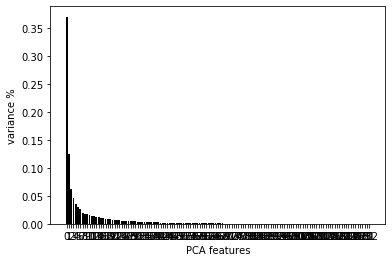

In [28]:
import matplotlib.pyplot as plt
features= range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [29]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=pcr_model.predict(X_reduced_test) #eğitim setinde kurmuş olduğum modeli kullanarak indirgenmiş test seti için tahmin değerleri
np.sqrt(mean_squared_error(y_test,y_pred))

40.48917518968003

In [31]:
from sklearn import model_selection 

In [32]:
cv_10 = model_selection.KFold(n_splits=5,
                             shuffle = False,
                             random_state=1)

In [33]:
lm = LinearRegression()
RMSE=[]
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score= np.sqrt(-1*model_selection.cross_val_score(lm,
                                                     X_reduced_train[:,:i],
                                                     y_train.ravel(),
                                                     cv=cv_10,
                                                     scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

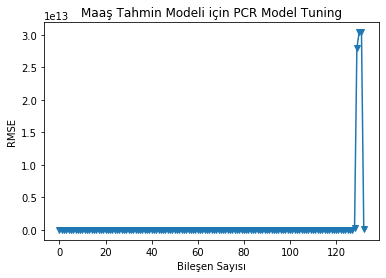

In [34]:
plt.plot(RMSE,'-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli için PCR Model Tuning');

In [35]:
for i in range (len(RMSE)):
    if RMSE[i] == min(RMSE):
        print (i)

3


_PCA sonrası 3 component ile modeli yeniden fit edip test hatasına bakacağım._

In [36]:
pca_3=PCA()
lm= LinearRegression()
X_reduced_train4=pca_3.fit_transform(scale(X_train))
X_reduced_test4=pca_3.fit_transform(scale(X_test))
pcr_model_=lm.fit(X_reduced_train4[:,0:3],y_train) 
y_pred_train=pcr_model_.predict(X_reduced_train4[:,0:3])
print("Train Hatası:", np.sqrt(mean_squared_error(y_train,y_pred_train))) #train hatası
y_pred_test=pcr_model_.predict(X_reduced_test4[:,0:3])
print("Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred_test)))      

Train Hatası: 36.68598149510537
Test Hatası: 36.13373566609944


In [73]:
pca_3=PCA(n_components=3)
lm= LinearRegression()
X_reduced_train4=pca_3.fit_transform(scale(X_train))
X_reduced_test4=pca_3.fit_transform(scale(X_test))
pcr_model_=lm.fit(X_reduced_train4,y_train) 
y_pred_train=pcr_model_.predict(X_reduced_train4)
print("Train Hatası:", np.sqrt(mean_squared_error(y_train,y_pred_train))) #train hatası
y_pred_test=pcr_model_.predict(X_reduced_test4)
print("Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred_test)))  

Train Hatası: 36.68598179533781
Test Hatası: 36.13373690202501


In [107]:
X_train2=X_reduced_train4
X_test2=X_reduced_test4

In [108]:
lm_model=lm.fit(X_train2,y_train)
y_pred=lm_model.predict(X_test2)
print("Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred)))

Test Hatası: 36.13373690202501


# SVM

In [76]:
X_train2=X_reduced_train4
X_test2=X_reduced_test4

In [77]:
from sklearn.svm import SVR

In [78]:
svr_model=SVR(kernel="linear").fit(X_train2,y_train)

y_pred=svr_model.predict(X_test2)
print("Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred)))  


Test Hatası: 48.57426089489672


In [79]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# SVM TUNED

In [80]:
svr_params={"C":np.arange(2,5),"kernel":["linear","rbf","poly"]}
svr=SVR()
svr_tuned=GridSearchCV(svr,svr_params,
                         cv=10,n_jobs=-1,
                         verbose=2)
svr_tuned.fit(X_train2,y_train)
print("SVM için en iyi parametre sonuclari:", svr_tuned.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 484.3min finished


SVM için en iyi parametre sonuclari: {'C': 4, 'kernel': 'rbf'}


In [105]:
svrtuned=SVR(C=4,kernel="rbf").fit(X_train2,y_train)

In [106]:
y_pred=svrtuned.predict(X_test2)
print("SVM için Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred)))

SVM için Test Hatası: 43.60063651084294


# CatBoosting

In [101]:
X_train2=X_reduced_train4
X_test2=X_reduced_test4
from catboost import CatBoostRegressor
catb=CatBoostRegressor()
catb_model=catb.fit(X_train2,y_train)

Learning rate set to 0.048996
0:	learn: 36.9503407	total: 2.84ms	remaining: 2.83s
1:	learn: 36.8957675	total: 4.87ms	remaining: 2.43s
2:	learn: 36.8353476	total: 6.94ms	remaining: 2.31s
3:	learn: 36.7768047	total: 9.41ms	remaining: 2.34s
4:	learn: 36.7258306	total: 12ms	remaining: 2.39s
5:	learn: 36.6802888	total: 15.3ms	remaining: 2.54s
6:	learn: 36.6393059	total: 18.1ms	remaining: 2.56s
7:	learn: 36.5964738	total: 20.8ms	remaining: 2.57s
8:	learn: 36.5585267	total: 23.6ms	remaining: 2.6s
9:	learn: 36.5156226	total: 27.6ms	remaining: 2.73s
10:	learn: 36.4795268	total: 29.9ms	remaining: 2.69s
11:	learn: 36.4367616	total: 32.1ms	remaining: 2.64s
12:	learn: 36.4016316	total: 34.2ms	remaining: 2.6s
13:	learn: 36.3688993	total: 36.8ms	remaining: 2.59s
14:	learn: 36.3393346	total: 38.9ms	remaining: 2.56s
15:	learn: 36.3113245	total: 41.4ms	remaining: 2.55s
16:	learn: 36.2804075	total: 43.6ms	remaining: 2.52s
17:	learn: 36.2501808	total: 45.7ms	remaining: 2.49s
18:	learn: 36.2304754	total: 4

In [41]:
y_pred_cat=catb_model.predict(X_test2)

In [42]:
print("Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred_cat)))

Test Hatası: 38.17857172502875


# Model Tuning for CatBoosting

In [62]:
catb_params={
    'iterations':[200,500,1000],
    'learning_rate':[0.01,0.02,0.05,0.1],
    'depth':[5,10]
}
catb=CatBoostRegressor()
catb_tuned=GridSearchCV(catb,catb_params,cv=10,n_jobs=-1,verbose=2)
catb_tuned.fit(X_train2,y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 27.0min finished


0:	learn: 37.0025376	total: 2.16ms	remaining: 430ms
1:	learn: 36.9899247	total: 4.02ms	remaining: 398ms
2:	learn: 36.9775203	total: 5.75ms	remaining: 377ms
3:	learn: 36.9657030	total: 7.53ms	remaining: 369ms
4:	learn: 36.9547791	total: 9.36ms	remaining: 365ms
5:	learn: 36.9448618	total: 11ms	remaining: 357ms
6:	learn: 36.9336960	total: 12.9ms	remaining: 356ms
7:	learn: 36.9239100	total: 14.6ms	remaining: 350ms
8:	learn: 36.9117318	total: 16.4ms	remaining: 348ms
9:	learn: 36.9025730	total: 18.2ms	remaining: 346ms
10:	learn: 36.8912327	total: 20ms	remaining: 343ms
11:	learn: 36.8799921	total: 21.6ms	remaining: 339ms
12:	learn: 36.8690810	total: 23.3ms	remaining: 335ms
13:	learn: 36.8573815	total: 25ms	remaining: 332ms
14:	learn: 36.8470454	total: 26.8ms	remaining: 330ms
15:	learn: 36.8363691	total: 28.5ms	remaining: 328ms
16:	learn: 36.8256627	total: 30.3ms	remaining: 326ms
17:	learn: 36.8163887	total: 32ms	remaining: 323ms
18:	learn: 36.8069465	total: 33.8ms	remaining: 322ms
19:	learn: 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x00000255D87B5278>,
             iid='warn', n_jobs=-1,
             param_grid={'depth': [5, 10], 'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.02, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [63]:
print("Catboost için en iyi parametre sonuclari:", catb_tuned.best_params_)

Catboost için en iyi parametre sonuclari: {'depth': 5, 'iterations': 200, 'learning_rate': 0.01}


In [102]:
catb_tuned=CatBoostRegressor(iterations=200,
                            learning_rate=0.01,
                            depth=5)
catb_tuned.fit(X_train2,y_train)
y_pred=catb_tuned.predict(X_test2)


0:	learn: 37.0025376	total: 2.63ms	remaining: 523ms
1:	learn: 36.9899247	total: 4.53ms	remaining: 448ms
2:	learn: 36.9775203	total: 6.41ms	remaining: 421ms
3:	learn: 36.9657030	total: 8.4ms	remaining: 412ms
4:	learn: 36.9547791	total: 10.4ms	remaining: 407ms
5:	learn: 36.9448618	total: 12.4ms	remaining: 400ms
6:	learn: 36.9336960	total: 14.2ms	remaining: 392ms
7:	learn: 36.9239100	total: 16.2ms	remaining: 388ms
8:	learn: 36.9117318	total: 17.9ms	remaining: 380ms
9:	learn: 36.9025730	total: 19.7ms	remaining: 375ms
10:	learn: 36.8912327	total: 21.7ms	remaining: 372ms
11:	learn: 36.8799921	total: 23.5ms	remaining: 368ms
12:	learn: 36.8690810	total: 25.3ms	remaining: 364ms
13:	learn: 36.8573815	total: 27.1ms	remaining: 360ms
14:	learn: 36.8470454	total: 29ms	remaining: 357ms
15:	learn: 36.8363691	total: 30.9ms	remaining: 356ms
16:	learn: 36.8256627	total: 32.9ms	remaining: 354ms
17:	learn: 36.8163887	total: 34.7ms	remaining: 351ms
18:	learn: 36.8069465	total: 36.6ms	remaining: 348ms
19:	le

In [104]:
print("Tuned Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred)))

Tuned Test Hatası: 36.084568737269564


# LIGHTGBM

In [96]:
from lightgbm import LGBMRegressor
lgmr=LGBMRegressor()
lgmr_model=lgmr.fit(X_train2,y_train)

In [81]:
?lgmr

In [98]:
y_predL=lgmr_model.predict(X_test2)

In [99]:
print("Lgbm Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_predL)))

Lgbm Test Hatası:  38.503418695778635


 **LGBM Model Tuning**

In [82]:
lgb_params={"learning_rate": [0.001,0.01,0.1],
           "n_estimators":[300,500,1000],
           "max_depth":[10,15],
           "min_child_samples":[40,60],
           "subsample":[0.6,0.8],
           "importance_type":["gains","split"]}
lgb=LGBMRegressor()

lgb_tuned=GridSearchCV(lgb,lgb_params,cv=10,n_jobs=-1,verbose=2)
lgb_tuned.fit(X_train2,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambd...t=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'importance_type': ['gains', 'split'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [10, 15], 'min_c

In [84]:
print("En iyi parametreler:" + str(lgb_tuned.best_params_))

En iyi parametreler:{'importance_type': 'gains', 'learning_rate': 0.001, 'max_depth': 10, 'min_child_samples': 40, 'n_estimators': 300, 'subsample': 0.6}


In [100]:
lgb=LGBMRegressor(learning_rate=0.001,
                             max_depth=10,
                             min_child_samples=40,
                             n_estimators=300,
                  subsample=0.6,
                  importance_type='gains')
lgb_tuned=lgb.fit(X_train2,y_train)
y_pred=lgb_tuned.predict(X_test2)
print("Lgbm tuned Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Lgbm tuned Test Hatası:  35.843937421309846


# KNN Regressors

In [92]:
X_train2=X_reduced_train4
X_test2=X_reduced_test4

In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
knn_modell=KNeighborsRegressor().fit(X_train2,y_train)
knn_modell.n_neighbors

5

In [92]:
knn_modell.effective_metric_

'euclidean'

In [94]:
y_predk=knn_modell.predict(X_test2)
np.sqrt(mean_squared_error(y_test, y_predk))

40.816038349035466

In [117]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train2, y_train)
    y_predd = knn_model.predict(X_test2) 
    rmse = np.sqrt(mean_squared_error(y_test,y_predd)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train2, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV", rmse_cv)

k = 1 için RMSE değeri:  51.78929757647801 RMSE_CV 51.87692182213024
k = 2 için RMSE değeri:  45.25106851761425 RMSE_CV 45.702853546898936
k = 3 için RMSE değeri:  43.102220808814586 RMSE_CV 43.61542751719369
k = 4 için RMSE değeri:  41.606429783986925 RMSE_CV 42.55077519583747
k = 5 için RMSE değeri:  40.816038349035466 RMSE_CV 41.89761927192418
k = 6 için RMSE değeri:  40.40617926991711 RMSE_CV 41.31769690200656
k = 7 için RMSE değeri:  40.09233227523015 RMSE_CV 40.89657110211363
k = 8 için RMSE değeri:  39.70383701758599 RMSE_CV 40.68116432692811
k = 9 için RMSE değeri:  39.34156939259381 RMSE_CV 40.47046031549786
k = 10 için RMSE değeri:  39.10404972737965 RMSE_CV 40.368594757412325
k = 11 için RMSE değeri:  38.82382452445804 RMSE_CV 40.09631142115494
k = 12 için RMSE değeri:  38.6010724931683 RMSE_CV 40.06349931914233
k = 13 için RMSE değeri:  38.32272856992129 RMSE_CV 39.8752463994564
k = 14 için RMSE değeri:  38.11036292788756 RMSE_CV 39.69345083338899
k = 15 için RMSE değeri:  

**Model Tuning for KNN**

In [107]:
knn_params={"weights":['uniform','distance']}
knn=KNeighborsRegressor(n_neighbors=10)
knn_tuned=GridSearchCV(knn,knn_params,cv=10,n_jobs=-1,verbose=2)
knn_tuned.fit(X_train2,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=10, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [108]:
print("En iyi parametreler:" + str(knn_tuned.best_params_))

En iyi parametreler:{'weights': 'uniform'}


In [94]:
knn_tuned=KNeighborsRegressor(n_neighbors=10, weights='uniform').fit(X_train2,y_train)
knn_tuned.n_neighbors

10

In [95]:
y_pred=knn_tuned.predict(X_test2)
print("Knn Tuned Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Knn Tuned Test Hatası:  39.11131352183348


# CART

In [60]:
#PCA cart
cart2 = DecisionTreeRegressor()
cart_model2=cart2.fit(X_train2,y_train)
y_pred_cart2 = cart_model2.predict(X_test2)
print("Cart test seti hatası:", np.sqrt(mean_squared_error(y_test, y_pred_cart2)))

Cart test seti hatası: 52.44141523804343


In [61]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_model2);

Error in callback <function flush_figures at 0x000001BF7251FD90> (for post_execute):


KeyboardInterrupt: 

# Cart Tuning

In [114]:
cart_params = {"min_samples_split": range(50,150),
               "min_samples_leaf": [30,50]}
               
cart_cv_model = GridSearchCV(cart_model2, cart_params, cv=10, n_jobs=-1, verbose=2)
cart_cv_model.fit(X_train2, y_train)
print("Cart için en iyi parametre sonuclari:", cart_cv_model.best_params_)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s


Cart için en iyi parametre sonuclari: {'min_samples_leaf': 50, 'min_samples_split': 149}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   11.7s finished


In [89]:
cart_tuned = DecisionTreeRegressor(criterion='mse',min_samples_leaf=50, 
                                   
                                   min_samples_split=149)
cart_tuned.fit(X_train2, y_train)
y_pred = cart_tuned.predict(X_test2)
print("CART Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred)))

CART Test Hatası: 37.48926877346389


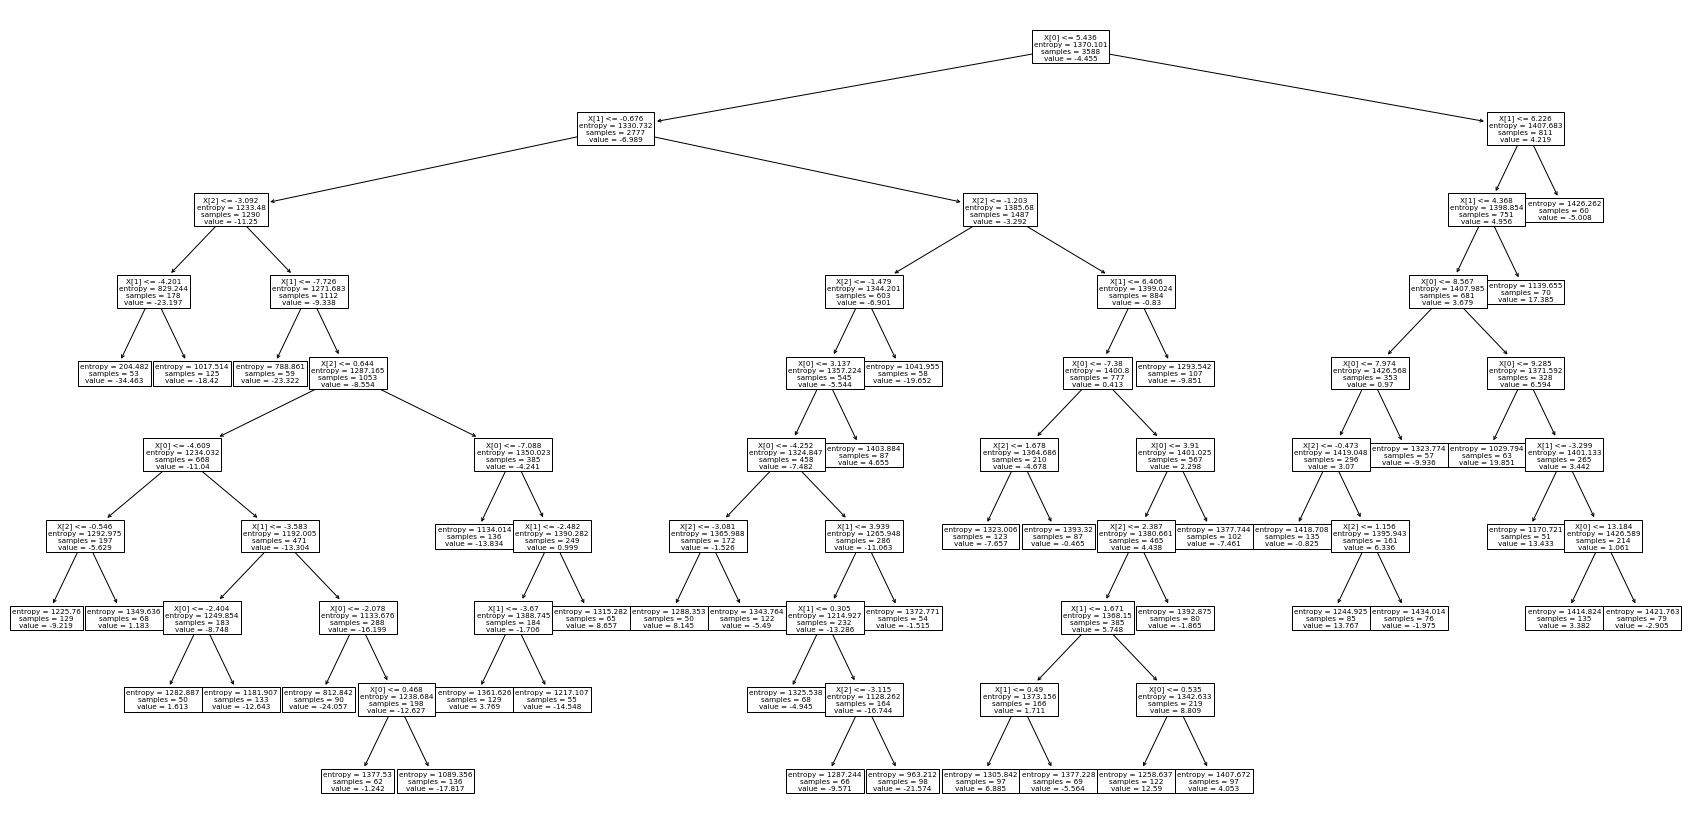

In [45]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

# Random Forest

In [46]:
X_train2=X_reduced_train4
X_test2=X_reduced_test4
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train2, y_train)
y_pred_r=rfr_model.predict(X_test2)
print("Random Forest Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred_r)))

Random Forest Test Hatası: 39.81461536481563


Random Forest Model  Tuning

In [83]:
rfr_params = {"max_depth": list(range(1,10)),
              
              "n_estimators": [60,100]}

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train2, y_train)
print("random forest best  parameters:",rfr_cv_model.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.3s


random forest best  parameters: {'max_depth': 1, 'n_estimators': 60}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   27.7s finished


In [84]:
rfr_tuned = RandomForestRegressor(max_depth=1,
                              
                                  n_estimators=60)
rfr_tuned.fit(X_train2, y_train)
y_pred = rfr_tuned.predict(X_test2)
print("random forest tuning sonrası test hatası:",np.sqrt(mean_squared_error(y_test, y_pred)))

random forest tuning sonrası test hatası: 35.7615589978037


# Yapay Sinir Ağı

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train2)
x_train_scaledd = scaler.transform(X_train2)

scaler.fit(X_test2)
x_test_scaledd = scaler.transform(X_test2)

In [55]:
from sklearn.neural_network import MLPRegressor
mlp_modelk = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaledd, y_train)
mlp_modelk

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [56]:
y_pred_nn = mlp_modelk.predict(x_test_scaledd)
print("Yapay Sinir Ağı Test Hatası:",np.sqrt(mean_squared_error(y_test,y_pred_nn))) #Ysa

Yapay Sinir Ağı Test Hatası: 36.81251100782281


# Yapay Sinir Ağı Model Tuning

In [57]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_modelk, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(x_train_scaledd, y_train)
print("Yapay sinir ağı en iyi parametre değerleri:", mlp_cv_model.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 24.1min finished


Yapay sinir ağı en iyi parametre değerleri: {'activation': 'logistic', 'alpha': 0.02, 'hidden_layer_sizes': (20, 20)}


In [58]:
mlp_tuned = MLPRegressor(alpha= 0.02, hidden_layer_sizes=(20,20), activation="logistic")
mlp_tuned.fit(x_train_scaledd, y_train)

MLPRegressor(activation='logistic', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
X_test2=x_test_scaledd

In [125]:
y_pred = mlp_tuned.predict(X_test2)
print("Yapay Sinir Ağı Test Hatası:",np.sqrt(mean_squared_error(y_test,y_pred)))

Yapay Sinir Ağı Test Hatası: 36.40390831881333


In [129]:
modeller=[
   lm_model,
   cart_tuned,
   rfr_tuned,
   mlp_tuned,
   svrtuned,
   catb_tuned,
   lgb_tuned,
   knn_tuned,
]
for model in modeller:
    isimler=model.__class__.__name__
    y_pred=model.predict(X_test2)
    sonuc=np.sqrt(mean_squared_error(y_test,y_pred))
    print("-"*28)
    print(isimler +":")
    print("Model Sonuçları:",sonuc)

----------------------------
LinearRegression:
Model Sonuçları: 36.13373690202501
----------------------------
DecisionTreeRegressor:
Model Sonuçları: 37.37481484490728
----------------------------
RandomForestRegressor:
Model Sonuçları: 35.7615589978037
----------------------------
MLPRegressor:
Model Sonuçları: 36.40390831881333
----------------------------
SVR:
Model Sonuçları: 43.60063651084294
----------------------------
CatBoostRegressor:
Model Sonuçları: 36.084568737269564
----------------------------
LGBMRegressor:
Model Sonuçları: 35.843937421309846
----------------------------
KNeighborsRegressor:
Model Sonuçları: 39.11131352183348
